WRF model output from 5 simulations: statistical analysis and hypothese testing
Andrey Martynov, andrey.martynov@giub.unibe.ch
CAS, Module 2, September 2018
Data source: WRF simulation WRF_2012_01a
Datasheet: 
Version 01

In [22]:
"""Importing required modules"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import genextreme as gev
import matplotlib.patches as mpatches

Import the single column data from 5 simulations: 
three current climate Morrison runs (1-3), 
one current climate Thompson run (4), 
one climate change Morrison run (5)

In [3]:
in_data01=pd.read_table('wrf_2012_01_column_add.txt').values
in_data02=pd.read_table('wrf_2012_01_26_column_add.txt').values
in_data03=pd.read_table('wrf_2012_01_27_column_add.txt').values
in_data04=pd.read_table('wrf_2012_02_column_add.txt').values
in_data05=pd.read_table('wrf_2012_01a_column_add.txt').values

In [4]:
#Convert the 1D array into the 2D array
table_data01=in_data01.reshape((2208,145))
table_data02=in_data02.reshape((2208,145))
table_data03=in_data03.reshape((2208,145))
table_data04=in_data04.reshape((2208,145))
table_data05=in_data05.reshape((2208,145))

Hail size: AFWA_HAIL_NEWMEAN, 140th column

In [5]:
hail_size01=table_data01[:,139]
hail_size02=table_data02[:,139]
hail_size03=table_data03[:,139]
hail_size04=table_data04[:,139]
hail_size05=table_data05[:,139]

In [6]:
#Prepare drawing the hail size dependence on time

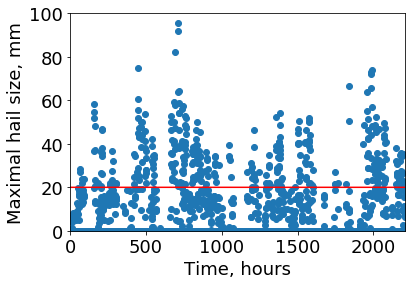

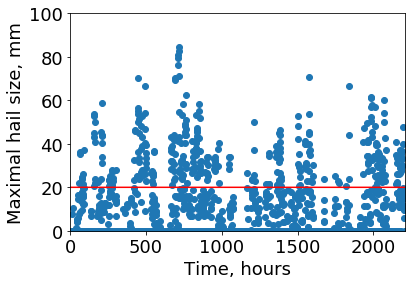

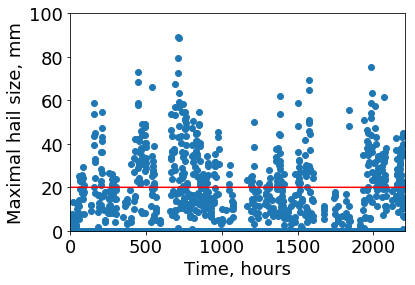

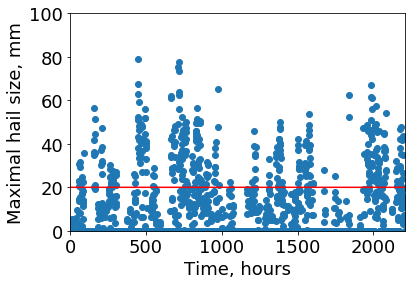

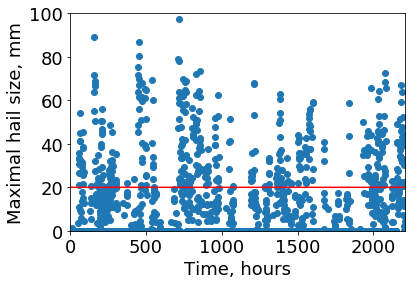

In [7]:
times=np.arange(2208)
severity_level=np.full((2208), 20) # Severe hail threshold

plt.rcParams.update({'font.size': 18}) # default font size

dsets=[hail_size01,hail_size02,hail_size03,hail_size04,hail_size05]

n=1 # figure counter

for hail_size in dsets:
    
    plt.scatter(times,hail_size)
    plt.xlabel("Time, hours")
    plt.ylabel("Maximal hail size, mm")
    plt.xlim((0,2207))
    plt.ylim((0.001,100))
    plt.plot(times,severity_level,'r')         
    plt.savefig('/home/andrey/Documents/WORK/Python/CAS2/Figure3_' + str(n) + '.jpg',bbox_inches='tight')
    plt.show()
    
    n +=1
    

In [13]:
#Function removing zero or small values (less that 5 mm from a simulation set)

def nonzero(hail_size):
    nonzero_hail_sizeF=[]
    for hail_s in hail_size:
        if hail_s > 5.0:
#        print(hail_s)
            try:
                nonzero_hail_sizeF.append(hail_s)
            except AttributeError:  nonzero_hail_sizeF=[hail_s]
            except NameError:  nonzero_hail_sizeF=[hail_s]

    return nonzero_hail_sizeF

Fitting the non-zero data with the Generalized Extreme Values distribution
and printing the data

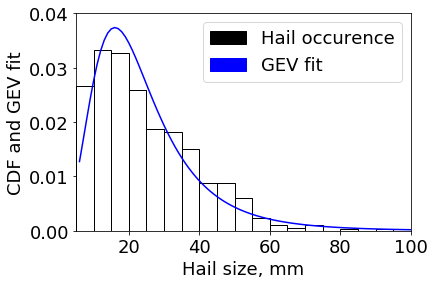

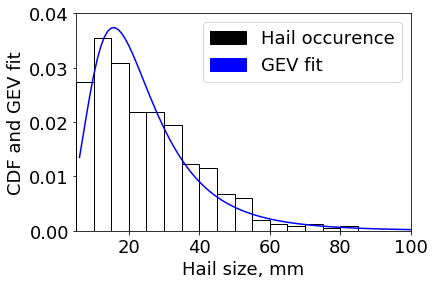

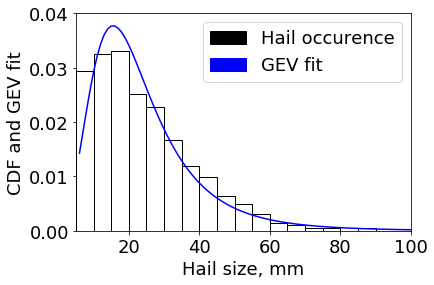

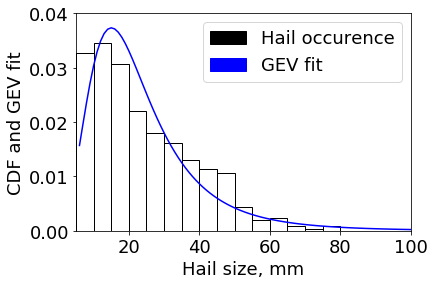

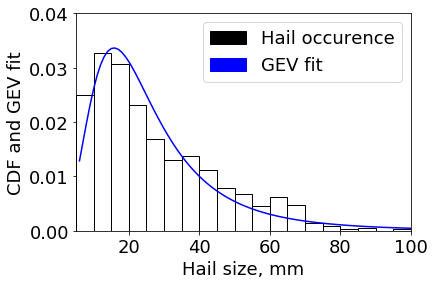

In [16]:
fits=[]

u=1 # simulation counter 1-5
nonzero_hail_sizes=[]
for hail_size in dsets:

    nonzero_hail_size=nonzero(hail_size)

    t = np.linspace(1,2208,2208)
    tb = np.linspace(1,19,19)

    fit = gev.fit(nonzero_hail_size) # fitting the data with GEV
    fits.append(fit) #array of fit parametrers

    #Drawing histograms and fits
    pdf = gev.pdf(t, *fit)
    
    plt.plot(t[5:100], pdf[5:100],label='Fitted treated line',color="blue")
    plt.hist(hail_size,bins=19,range=(5,100),fill=False,alpha=1.0,histtype='bar',color="blue",density=True,label='Fitted treated line')

    plt.ylabel("CDF and GEV fit")
    plt.xlabel("Hail size, mm")
    plt.xlim((5,100))
    plt.ylim((0.00,0.04))  
    blue_patch = mpatches.Patch(color='blue', label='GEV fit')
    black_patch = mpatches.Patch(color='black', label='Hail occurence')
    plt.legend(handles=[black_patch,blue_patch])
    #Saving the figures
    plt.savefig('/home/andrey/Documents/WORK/Python/CAS2/Figure4_' + str(u) + '.jpg',bbox_inches='tight')
    plt.show()
    u +=1
    

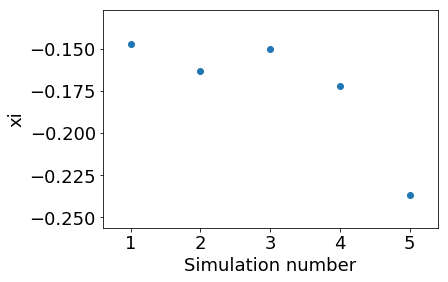

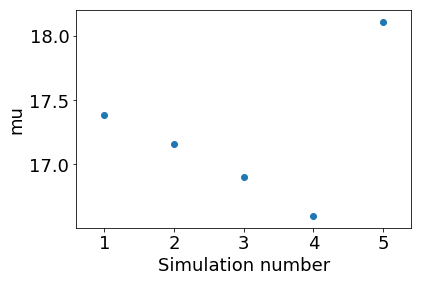

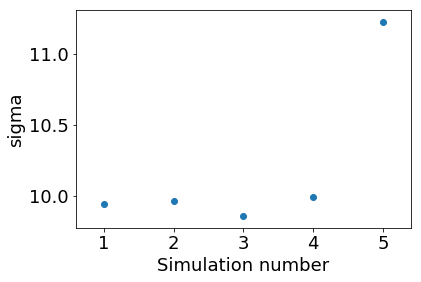

In [14]:
"""
Drawing and saving the fit parameters
"""
mu=[]
sigma=[]
xi=[]
for fit in fits:
    xi.append(fit[0])
    mu.append(fit[1])
    sigma.append(fit[2])
    

x=range(1,6)

plt.xlim((0.6,5.4))
plt.xlabel("Simulation number")
plt.scatter(x,xi)
plt.ylabel("xi")
plt.savefig('/home/andrey/Documents/WORK/Python/CAS2/Figure5_xi.jpg',bbox_inches='tight')
plt.show()

plt.xlim((0.6,5.4))
plt.xlabel("Simulation number")
plt.scatter(x,mu)
plt.ylabel("mu")
plt.savefig('/home/andrey/Documents/WORK/Python/CAS2/Figure5_mu.jpg',bbox_inches='tight')
plt.show()

plt.xlim((0.6,5.4))
plt.xlabel("Simulation number")
plt.scatter(x,sigma)
plt.ylabel("sigma")
plt.savefig('/home/andrey/Documents/WORK/Python/CAS2/Figure5_sigma.jpg',bbox_inches='tight')
plt.show()


In [18]:
"""
Grouping fit parameters: _iv: internal variability runs (1-3),_test: runs to test (4-5)
"""
xi_iv=[]
mu_iv=[]
sigma_iv=[]
for fit in fits[0:3]:

    xi_iv.append(fit[0])
    mu_iv.append(fit[1])
    sigma_iv.append(fit[2])


xi_test=[]
mu_test=[]
sigma_test=[]
for fit in fits[3:5]:

    xi_test.append(fit[0])
    mu_test.append(fit[1])
    sigma_test.append(fit[2])


Normality tests (Shapiro)

In [26]:
k2, p = stats.shapiro(xi_iv) 
alpha = 0.005 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected")
else:
     print("The null hypothesis cannot be rejected")

Alpha =  0.005
p =  0.38802456855773926
The null hypothesis cannot be rejected


In [27]:
k2, p = stats.shapiro(sigma_iv) 
alpha = 0.005 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected")
else:
     print("The null hypothesis cannot be rejected")

Alpha =  0.005
p =  0.3605838418006897
The null hypothesis cannot be rejected


In [28]:
k2, p = stats.shapiro(mu_iv) 
alpha = 0.005 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The null hypothesis can be rejected")
else:
     print("The null hypothesis cannot be rejected")

Alpha =  0.005
p =  0.9333656430244446
The null hypothesis cannot be rejected


In [29]:
"""
Printing out the mean and variance for fit parameters
"""
print(stats.norm.fit(xi_iv))
print(stats.norm.fit(mu_iv))
print(stats.norm.fit(sigma_iv))

(-0.1533051943483902, 0.006894768283182255)
(17.14697944877113, 0.19949025005886079)
(9.920215297883235, 0.04465502079257515)


In [40]:
#P-value for the simulation 3, parameter: xi
p_value = 1 - stats.norm.cdf(xi_test[0],stats.norm.fit(xi_iv)[0],stats.norm.fit(xi_iv)[1])
print(p_value)

0.9969954770885877


In [41]:
#P-value for the simulation 3, parameter: mu
p_value = 1 - stats.norm.cdf(mu_test[0],stats.norm.fit(mu_iv)[0],stats.norm.fit(mu_iv)[1])
print(p_value)

0.9971561380445261


In [42]:
#P-value for the simulation 3, parameter: sigma
p_value = 1 - stats.norm.cdf(sigma_test[0],stats.norm.fit(sigma_iv)[0],stats.norm.fit(mu_iv)[1])
print(p_value)

0.3610655599122644


In [43]:
#P-value for the simulation 4, parameter: xi
p_value = 1 - stats.norm.cdf(xi_test[1],stats.norm.fit(xi_iv)[0],stats.norm.fit(xi_iv)[1])
print(p_value)

1.0


In [44]:
#P-value for the simulation 4, parameter: mu
p_value = 1 - stats.norm.cdf(mu_test[1],stats.norm.fit(mu_iv)[0],stats.norm.fit(mu_iv)[1])
print(p_value)

6.984053279035507e-07


In [45]:
#P-value for the simulation 4, parameter: sigma
p_value = 1 - stats.norm.cdf(sigma_test[1],stats.norm.fit(sigma_iv)[0],stats.norm.fit(mu_iv)[1])
print(p_value)

3.3183900072231154e-11
